# 피마 인디언 당뇨병 예측 실습

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_df = pd.read_csv('diabetes.csv')
print(type(diabetes_df), diabetes_df.shape)
print(diabetes_df['Outcome'].value_counts())
diabetes_df.head()

<class 'pandas.core.frame.DataFrame'> (768, 9)
Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [46]:
def get_clf_eval(y_test, y_pred=None, pre_proba=None):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, pre_proba)
    print("# 오차행렬", confusion, sep="\n")
    print("accuary: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, f1: {3:.4f}, roc_auc: {4:.4f}".format(accuracy, precision, recall, f1, roc_auc))

In [47]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    print(type(y_test), y_test.shape, y_test)
    print(type(pred_proba_c1), pred_proba_c1.shape, pred_proba_c1)
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    #
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    #
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    #
    plt.xlabel('Thresholds')
    plt.ylabel('Precision and Recall')
    plt.legend()
    plt.grid()
    plt.show()

## LogisticRegression으로 학습 및 예측

In [48]:
x_data = diabetes_df.iloc[:, :-1] # DataFrame
y_data = diabetes_df.iloc[:, -1] # Series
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=156, stratify=y_data)

lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
y_pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)[:,1]
get_clf_eval(y_test, y_pred, pred_proba)

# 오차행렬
[[88 12]
 [23 31]]
accuary: 0.7727, precision: 0.7209, recall: 0.5741, f1: 0.6392, roc_auc: 0.7919


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Precision & Recall 곡선

<class 'pandas.core.series.Series'> (154,) 81     0
682    0
169    0
693    1
9      1
      ..
293    1
344    0
650    0
415    1
505    0
Name: Outcome, Length: 154, dtype: int64
<class 'numpy.ndarray'> (154,) [0.02178097 0.20835917 0.15491262 0.49417139 0.04521106 0.58827093
 0.74407001 0.2038365  0.15100705 0.15556924 0.67828682 0.49895517
 0.06555345 0.41044112 0.21076802 0.12144139 0.75384264 0.40665241
 0.03584697 0.78510928 0.46240394 0.30151563 0.06813223 0.33973902
 0.34347616 0.11167041 0.91770718 0.65564077 0.17031479 0.8118247
 0.20075209 0.20553401 0.1398484  0.23132996 0.15171353 0.70465241
 0.27898175 0.68451798 0.80784279 0.60809301 0.40813039 0.33908264
 0.65039905 0.25119317 0.31264656 0.04203769 0.76039156 0.13033055
 0.48979187 0.29484592 0.34285407 0.8262493  0.84769023 0.08552161
 0.15876954 0.31502485 0.09989995 0.36651438 0.39403265 0.40906361
 0.22738161 0.73446168 0.36856036 0.55665167 0.23900893 0.10299254
 0.19940228 0.71099586 0.16520526 0.6785333  0.084

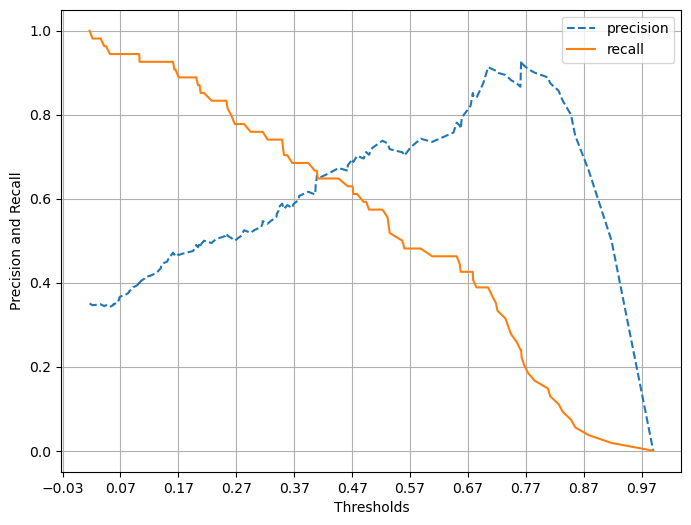

In [49]:
precision_recall_curve_plot(y_test, pred_proba)

## 각 feature의 4분위 분포 확인

In [50]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 'Glucose' feature Histogram

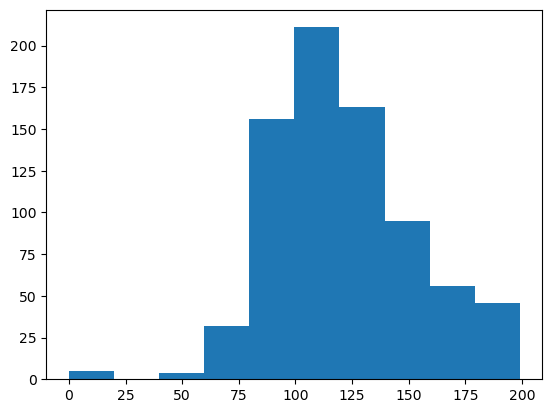

In [51]:
plt.hist(diabetes_df['Glucose'], bins=10)
plt.show()

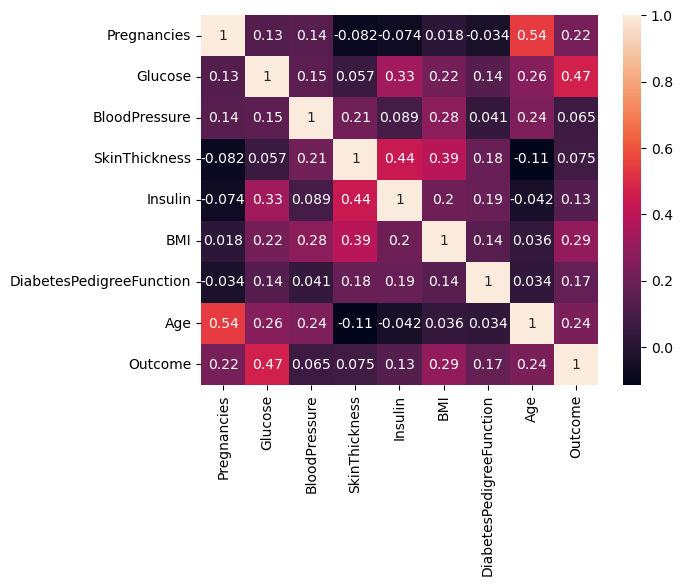

In [52]:
# sns.lmplot(x="Glucose", y="Outcome", data=diabetes_df)
sns.heatmap(diabetes_df.corr(), annot=True)
plt.show()

## zero 값이 있는 feature의 데이터 건수와 비율 계산

In [53]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_count = diabetes_df['Glucose'].count()
for feature in zero_features:
    zero_count = diabetes_df[diabetes_df[feature] == 0][feature].count()
    print("{0} zero count : {1} ({2:.2f}%)".format(feature, zero_count, 100*zero_count/total_count))

Glucose zero count : 5 (0.65%)
BloodPressure zero count : 35 (4.56%)
SkinThickness zero count : 227 (29.56%)
Insulin zero count : 374 (48.70%)
BMI zero count : 11 (1.43%)


## zero_features 컬럼의 값이 zero인 데이터를 평균값으로 대체 

In [54]:
diabetes_df[zero_features] = diabetes_df[zero_features].replace(0, diabetes_df[zero_features].mean())

## StandardScaler를 사용해 데이터를 변환한 후 LogisticRegression으로 학습 및 예측

In [55]:
x_data = diabetes_df.iloc[:, :-1] # DataFrame
y_data = diabetes_df.iloc[:, -1] # Series
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_data)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_data, test_size=0.2, random_state=156, stratify=y_data)

lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
y_pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)[:,1]
get_clf_eval(y_test, y_pred, pred_proba)

# 오차행렬
[[90 10]
 [21 33]]
accuary: 0.7987, precision: 0.7674, recall: 0.6111, f1: 0.6804, roc_auc: 0.8433


## 분류결정 임계값을 변경하면서 성능 측정

In [56]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    print(type(pred_proba_c1), pred_proba_c1.shape, pred_proba_c1[:3], sep="\n")
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("\nthreshold = ", custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

In [57]:
# thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5, 0.53, 0.56, 0.59]
thresholds = np.arange(0.3, 0.6, 0.01)
pred_proba = lr_clf.predict_proba(x_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

<class 'numpy.ndarray'>
(154, 1)
[[0.0355862 ]
 [0.20064588]
 [0.15758918]]

threshold =  0.3
# 오차행렬
[[67 33]
 [11 43]]
accuary: 0.7143, precision: 0.5658, recall: 0.7963, f1: 0.6615, roc_auc: 0.8433

threshold =  0.31
# 오차행렬
[[70 30]
 [11 43]]
accuary: 0.7338, precision: 0.5890, recall: 0.7963, f1: 0.6772, roc_auc: 0.8433

threshold =  0.32
# 오차행렬
[[71 29]
 [11 43]]
accuary: 0.7403, precision: 0.5972, recall: 0.7963, f1: 0.6825, roc_auc: 0.8433

threshold =  0.33
# 오차행렬
[[72 28]
 [12 42]]
accuary: 0.7403, precision: 0.6000, recall: 0.7778, f1: 0.6774, roc_auc: 0.8433

threshold =  0.34
# 오차행렬
[[73 27]
 [14 40]]
accuary: 0.7338, precision: 0.5970, recall: 0.7407, f1: 0.6612, roc_auc: 0.8433

threshold =  0.35000000000000003
# 오차행렬
[[75 25]
 [15 39]]
accuary: 0.7403, precision: 0.6094, recall: 0.7222, f1: 0.6610, roc_auc: 0.8433

threshold =  0.36000000000000004
# 오차행렬
[[76 24]
 [15 39]]
accuary: 0.7468, precision: 0.6190, recall: 0.7222, f1: 0.6667, roc_auc: 0.8433

threshold =  0.3700

In [58]:
thresholds = [0.53]
pred_proba = lr_clf.predict_proba(x_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

<class 'numpy.ndarray'>
(154, 1)
[[0.0355862 ]
 [0.20064588]
 [0.15758918]]

threshold =  0.53
# 오차행렬
[[91  9]
 [21 33]]
accuary: 0.8052, precision: 0.7857, recall: 0.6111, f1: 0.6875, roc_auc: 0.8433
